### IMAGE NEGATIVES


Text(0, 0.5, 'output')

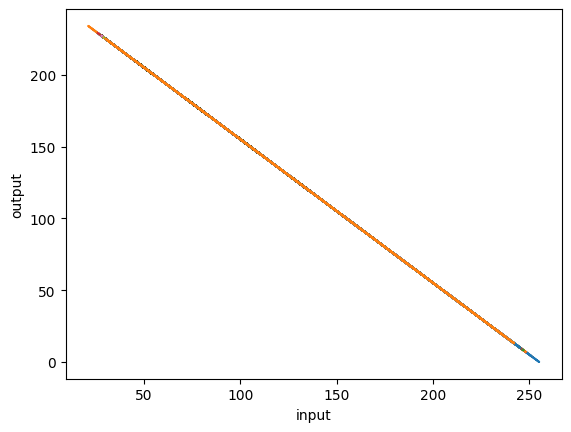

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
def negative_img(img):
    L=256
    neg_img=L-1-img
    #negg_img=np.clip(neg_img,0,L-1)}
    return neg_img



img=cv2.imread('Fig0304(a)(breast_digital_Xray).tif',0)
negative_image=negative_img(img)
cv2.imshow("Original Image", img)
cv2.imshow("Negative Image", negative_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
plt.plot(img,negative_image)
plt.xlabel("input")
plt.ylabel("output")

### Log Transformation

C:\Users\Shahid\AppData\Local\Temp\ipykernel_3988\2010425262.py:13: RuntimeWarning: divide by zero encountered in log
  log_transformed = 30 * (np.log(img + 1))
C:\Users\Shahid\AppData\Local\Temp\ipykernel_3988\2010425262.py:15: RuntimeWarning: invalid value encountered in cast
  log_transformed = log_transformed.astype('uint8')


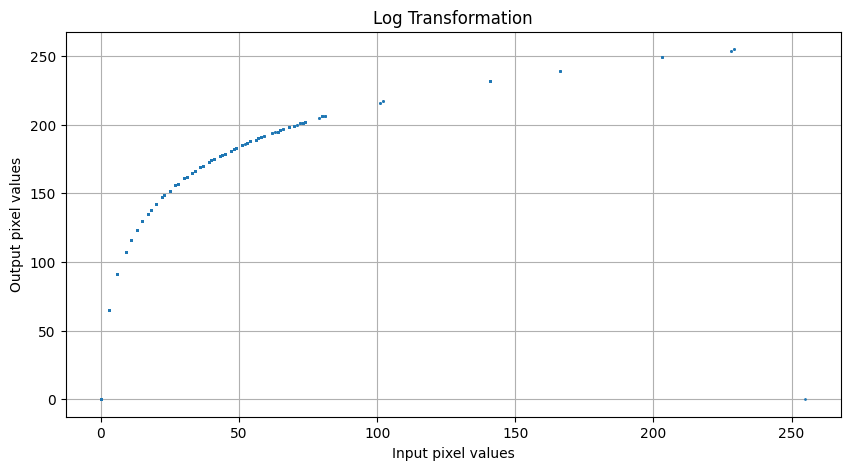

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image in grayscale
img = cv2.imread('Fig0305(a)(DFT_no_log).tif', cv2.IMREAD_GRAYSCALE)


log_transformed = 30 * (np.log(img + 1))
log_transformed = log_transformed / np.max(log_transformed) * 255
log_transformed = log_transformed.astype('uint8')

# Display images using OpenCV
cv2.imshow("Fourier Spectrum", img)
cv2.imshow("Log Transformation", log_transformed)

# Prepare data for plotting
# To visualize the log transformation relationship, we need to use flattened arrays
x = img.flatten()
y = log_transformed.flatten()

# Plotting with Matplotlib
plt.figure(figsize=(10, 5))
plt.plot(x, y, 'o', markersize=1)  # 'o' for dots
plt.xlabel("Input pixel values")
plt.ylabel("Output pixel values")
plt.title("Log Transformation")
plt.grid(True)
plt.show()

# Wait for a key press and close image windows
cv2.waitKey(0)
cv2.destroyAllWindows()


### Log Transformation

0
255
0
255


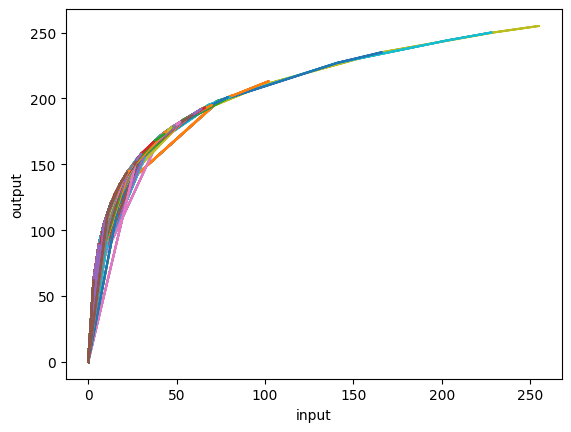

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread("Fig0305(a)(DFT_no_log).tif",cv2.IMREAD_GRAYSCALE)

frame=np.zeros((img.shape[0],img.shape[1]),dtype='uint8')
for i in range(img.shape[0]):
    for a in range(img.shape[1]):
        frame[i,a]=30*(np.log(img[i,a]+1))
frame=(frame/frame.max()*255).astype('uint8')       
cv2.imshow("image",img)
cv2.imshow("frame",frame)
plt.plot(img,frame)
plt.xlabel("input")
plt.ylabel("output")
#our img and frame images has no continuous values so that the plot result is look like this.
cv2.waitKey(0)
cv2.destroyAllWindows()
print(img.min())
print(img.max())
print(frame.min())
print(frame.max())

### Power Law Transformation

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
def transform(img,c,g):
    img = (255*img/img.max())
    trans_img=c*(np.power(img,g))
    return trans_img
img=cv2.imread('WhatsApp Image 2024-04-20 at 5.21.50 AM.jpeg',0).astype('uint8')
gamma_transformation1=transform(img,c=1,g=0.9)
print(np.all(gamma_transformation1 <255))
#gamma_transformation2=transform(img,c=1,g=0.4)
print(gamma_transformation1.max())
#gamma_transformation3=transform(gamma_transformation2,c=1,g=2.5)
cv2.imshow('original image',img)
cv2.imshow('trans1',gamma_transformation1)
#cv2.imshow('trans2',gamma_transformation2)
#cv2.imshow('trans3',gamma_transformation3)
cv2.waitKey(0)

cv2.destroyAllWindows()


True
0.8710044304536664


In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
def transform(img, c, g):
    trans_img = (c * img) ** g
    trans_img = ((trans_img - np.min(trans_img)) / (np.max(trans_img) - np.min(trans_img)) * 255).astype('uint8')
    
    return trans_img


img = cv2.imread('WhatsApp Image 2024-04-20 at 5.21.50 AM.jpeg', 0)  


cv2.imshow('original', img)


gamma_values = [3.0, 4.0, 5.0]
for i, gamma in enumerate(gamma_values):
    transformed_image = transform(img, c=1, g=gamma)
    cv2.imshow(f'(b)-(d) Gamma Corrected Image (Gamma = {gamma})', transformed_image)

cv2.waitKey(0)
cv2.destroyAllWindows()


### cliping

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
def contrast(img):
    clip=np.clip(img,0,255).astype('uint8')
    return clip
img=cv2.imread('Fig0310(b)(washed_out_pollen_image).tif',0)
row,col=img.shape[:2]
m=np.mean(img)

#threshold=thresholding(img,m)
scr=contrast(img)
print(scr.min())
    
cv2.imshow('original',img)  
cv2.imshow('contrast',scr)
#cv2.imshow('threshold',threshold)
cv2.waitKey(0)
cv2.destroyAllWindows()


91


### Thresholding

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('Fig0312(a)(kidney).tif', cv2.IMREAD_GRAYSCALE)
row,col=img.shape[:2]
mean=np.mean(img)
cv2.imshow('original',img)
for i in range(row):
    for j in range(col):
        if img[i,j]<mean:
            img[i,j]=0
        else:
            img[i,j]=255
cv2.imshow('threshold',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.show()

### Thresholding

In [15]:
img = cv2.imread('Fig0312(a)(kidney).tif', cv2.IMREAD_GRAYSCALE)
row,col=img.shape[:2]
mean=np.mean(img)
cv2.imshow('original',img)
for i in range(row):
    for j in range(col):
        if img[i,j]>150:
            img[i,j]=255
cv2.imshow('threshold',img)
cv2.waitKey(0)
cv2.destroyAllWindows()
            

### Bit Slicing

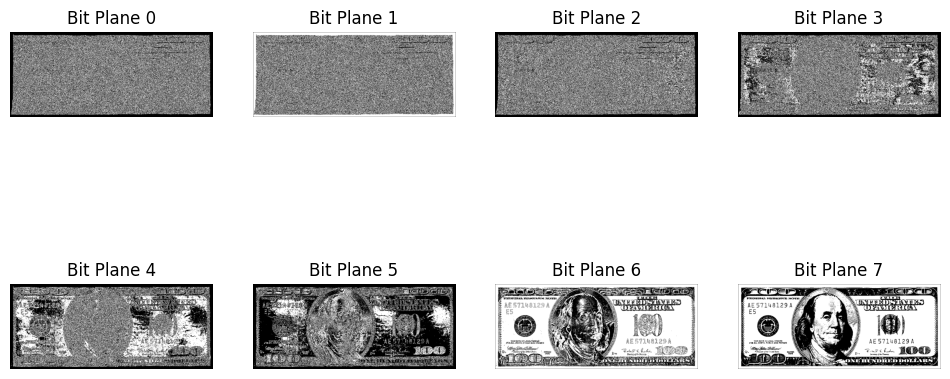

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('Fig0314(a)(100-dollars).tif', cv2.IMREAD_GRAYSCALE)

# Perform bit plane slicing
bit_planes = [np.bitwise_and(image, 2**i) for i in range(8)]

# Display bit planes
plt.figure(figsize=(12, 6))
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(bit_planes[i], cmap='gray')
    plt.title(f'Bit Plane {i}')
    plt.axis('off')
plt.show()


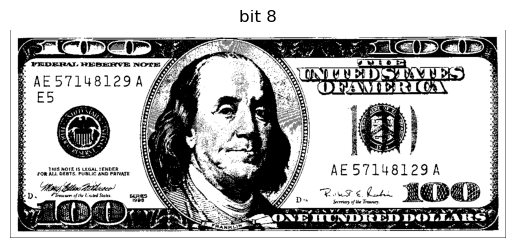

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread('Fig0314(a)(100-dollars).tif', cv2.IMREAD_GRAYSCALE)
row,col=img.shape[:2]
for i in range(row):
    for j in range(col):
        if img[i,j]>128:
            img[i,j]=255
        else:
            img[i,j]=0
plt.imshow(img,cmap='gray')
plt.title('bit 8')
plt.axis('off')
plt.show()

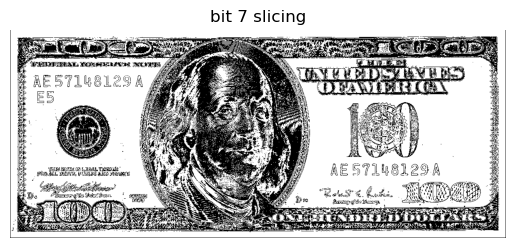

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread('Fig0314(a)(100-dollars).tif', cv2.IMREAD_GRAYSCALE)
row,col=img.shape[:2]
for i in range(row):
    for j in range(col):
        while img[i,j]>127:
            img[i,j]=img[i,j]-127
cv2.imshow('7 bit',img)            
for i in range(row): 
    for j in range(col):
        if img[i,j]>64:
            img[i,j]=255
        else:
            img[i,j]=0
plt.imshow(img,cmap='gray')
plt.title('bit 7 slicing')
plt.axis('off')
plt.show()
cv2.waitKey(0)
cv2.destroyAllWindows()

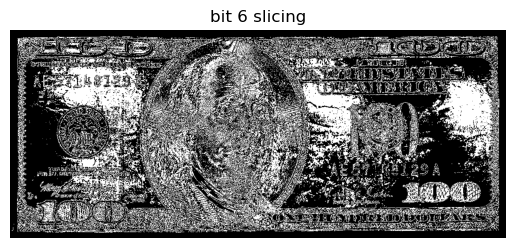

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread('Fig0314(a)(100-dollars).tif', cv2.IMREAD_GRAYSCALE)
row,col=img.shape[:2]
for i in range(row):
    for j in range(col):
        while img[i,j]>63:
            img[i,j]=img[i,j]-63
cv2.imshow('6 bit',img)            
for i in range(row): 
    for j in range(col):
        if img[i,j]>32:
            img[i,j]=255
        else:
            img[i,j]=0
plt.imshow(img,cmap='gray')
plt.title('bit 6 slicing')
plt.axis('off')
plt.show()
cv2.waitKey(0)
cv2.destroyAllWindows()

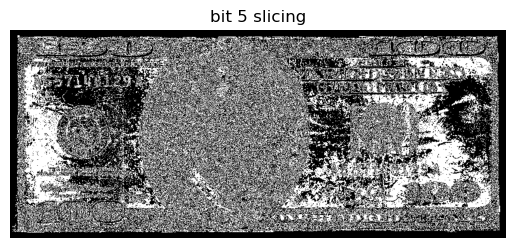

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread('Fig0314(a)(100-dollars).tif', cv2.IMREAD_GRAYSCALE)
row,col=img.shape[:2]
for i in range(row):
    for j in range(col):
        while img[i,j]>31:
            img[i,j]=img[i,j]-31
cv2.imshow('5 bit',img)            
for i in range(row): 
    for j in range(col):
        if img[i,j]>16:
            img[i,j]=255
        else:
            img[i,j]=0
plt.imshow(img,cmap='gray')
plt.title('bit 5 slicing')
plt.axis('off')
plt.show()
cv2.waitKey(0)
cv2.destroyAllWindows()

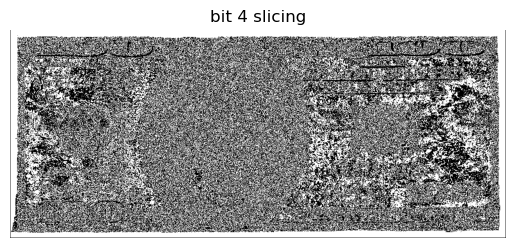

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread('Fig0314(a)(100-dollars).tif', cv2.IMREAD_GRAYSCALE)
row,col=img.shape[:2]
for i in range(row):
    for j in range(col):
        while img[i,j]>15:
            img[i,j]=img[i,j]-15
cv2.imshow('4 bit',img)            
for i in range(row): 
    for j in range(col):
        if img[i,j]>8:
            img[i,j]=255
        else:
            img[i,j]=0
plt.imshow(img,cmap='gray')
plt.title('bit 4 slicing')
plt.axis('off')
plt.show()
cv2.waitKey(0)
cv2.destroyAllWindows()

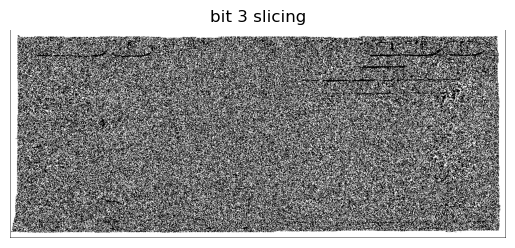

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread('Fig0314(a)(100-dollars).tif', cv2.IMREAD_GRAYSCALE)
row,col=img.shape[:2]
for i in range(row):
    for j in range(col):
        while img[i,j]>7:
            img[i,j]=img[i,j]-7
cv2.imshow('3 bit',img)            
for i in range(row): 
    for j in range(col):
        if img[i,j]>4:
            img[i,j]=255
        else:
            img[i,j]=0
plt.imshow(img,cmap='gray')
plt.title('bit 3 slicing')
plt.axis('off')
plt.show()
cv2.waitKey(0)
cv2.destroyAllWindows()

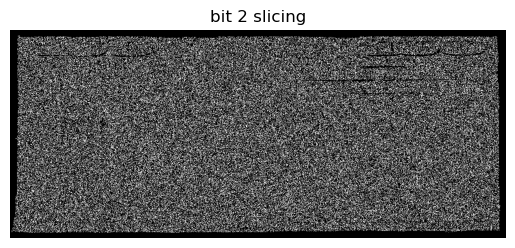

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread('Fig0314(a)(100-dollars).tif', cv2.IMREAD_GRAYSCALE)
row,col=img.shape[:2]
for i in range(row):
    for j in range(col):
        while img[i,j]>3:
            img[i,j]=img[i,j]-3
        else:
            img[i,j]=img[i,j]
cv2.imshow('2 bit',img)            
for i in range(row): 
    for j in range(col):
        if img[i,j]>2:
            img[i,j]=255
        else:
            img[i,j]=0
plt.imshow(img,cmap='gray')
plt.title('bit 2 slicing')
plt.axis('off')
plt.show()
cv2.waitKey(0)
cv2.destroyAllWindows()

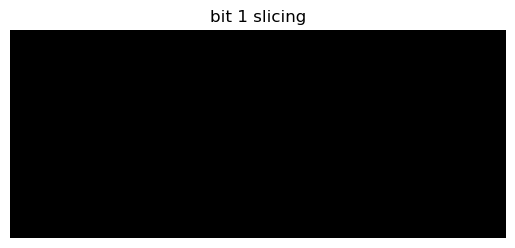

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread('Fig0314(a)(100-dollars).tif', cv2.IMREAD_GRAYSCALE)
row,col=img.shape[:2]
for i in range(row):
    for j in range(col):
        while img[i,j]>1:
            img[i,j]=img[i,j]-1
cv2.imshow('1 bit',img)            
for i in range(row): 
    for j in range(col):
        if img[i,j]>1:
            img[i,j]=255
        else:
            img[i,j]=0
plt.imshow(img,cmap='gray')
plt.title('bit 1 slicing')
plt.axis('off')
plt.show()
cv2.waitKey(0)
cv2.destroyAllWindows()

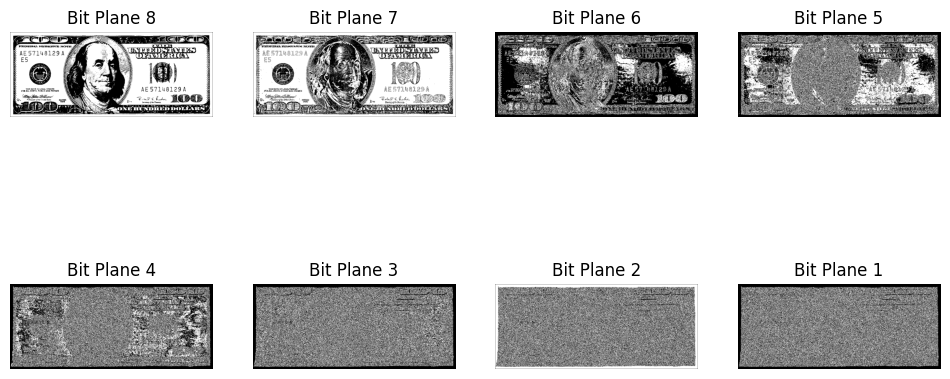

In [17]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Read the image in greyscale
img = cv2.imread('Fig0314(a)(100-dollars).tif', 0)

# Iterate over each pixel and change pixel value to binary using np.binary_repr() and store it in a list.
lst = []
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        lst.append(np.binary_repr(img[i][j], width=8))  # width = no. of bits

# Extract bit planes by multiplying with 2^(n-1) and reshape to reconstruct the bit image.
eight_bit_img = (np.array([int(i[0]) for i in lst], dtype=np.uint8) * 128).reshape(img.shape[0], img.shape[1])
seven_bit_img = (np.array([int(i[1]) for i in lst], dtype=np.uint8) * 64).reshape(img.shape[0], img.shape[1])
six_bit_img = (np.array([int(i[2]) for i in lst], dtype=np.uint8) * 32).reshape(img.shape[0], img.shape[1])
five_bit_img = (np.array([int(i[3]) for i in lst], dtype=np.uint8) * 16).reshape(img.shape[0], img.shape[1])
four_bit_img = (np.array([int(i[4]) for i in lst], dtype=np.uint8) * 8).reshape(img.shape[0], img.shape[1])
three_bit_img = (np.array([int(i[5]) for i in lst], dtype=np.uint8) * 4).reshape(img.shape[0], img.shape[1])
two_bit_img = (np.array([int(i[6]) for i in lst], dtype=np.uint8) * 2).reshape(img.shape[0], img.shape[1])
one_bit_img = (np.array([int(i[7]) for i in lst], dtype=np.uint8) * 1).reshape(img.shape[0], img.shape[1])

# Display all bit planes using matplotlib
plt.figure(figsize=(12, 6))

plt.subplot(2, 4, 1)
plt.imshow(eight_bit_img, cmap='gray')
plt.title('Bit Plane 8')
plt.axis('off')

plt.subplot(2, 4, 2)
plt.imshow(seven_bit_img, cmap='gray')
plt.title('Bit Plane 7')
plt.axis('off')

plt.subplot(2, 4, 3)
plt.imshow(six_bit_img, cmap='gray')
plt.title('Bit Plane 6')
plt.axis('off')

plt.subplot(2, 4, 4)
plt.imshow(five_bit_img, cmap='gray')
plt.title('Bit Plane 5')
plt.axis('off')

plt.subplot(2, 4, 5)
plt.imshow(four_bit_img, cmap='gray')
plt.title('Bit Plane 4')
plt.axis('off')

plt.subplot(2, 4, 6)
plt.imshow(three_bit_img, cmap='gray')
plt.title('Bit Plane 3')
plt.axis('off')

plt.subplot(2, 4, 7)
plt.imshow(two_bit_img, cmap='gray')
plt.title('Bit Plane 2')
plt.axis('off')

plt.subplot(2, 4, 8)
plt.imshow(one_bit_img, cmap='gray')
plt.title('Bit Plane 1')
plt.axis('off')

plt.show()


### contrast stretching

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import cv2



image = cv2.imread('Fig0310(b)(washed_out_pollen_image).tif', 0)


min_val = np.min(image)
max_val = np.max(image)

contrast=np.uint8(255 / (max_val - min_val) * (image - min_val))


cv2.imshow('image',image)
cv2.imshow('ged',contrast)
cv2.waitKey(0)
cv2.destroyAllWindows()
contrast.max()

255

### Histogram Equalization

149
149


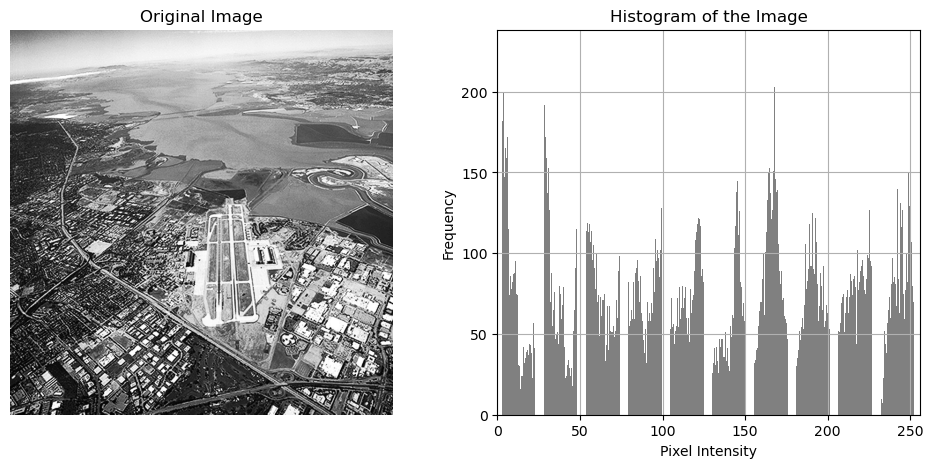

In [3]:
import matplotlib.pyplot as plt
def hist_equal(image, L = 256):
    pixels, nk = np.unique(image, return_counts = True)
    m,n = image.shape
    mn = m*n
    pr_rk = []
    for n in nk:
      pr_rk.append(n/mn)
    cdf = []
    temp = 0
    print(len(pr_rk))
    for i,val in enumerate(pr_rk):
      temp = temp + val
      cdf.append(temp)
    summation = dict(zip(pixels, cdf))
    print(pixels.size)
    equalized_image = np.zeros_like(image)
    for (h,w),x in np.ndenumerate(image):
        equalized_image[h][w] = np.floor((L-1)*summation[x])    
    return equalized_image



image = cv2.imread('Fig0309(a)(washed_out_aerial_image).tif', 0)


hist = hist_equal(image)
histogram = cv2.calcHist([hist], [0], None, [256], [0,256])
# Plotting
plt.figure(figsize=(12, 5))

# Plot the image
plt.subplot(1, 2, 1)
plt.imshow(hist, cmap='gray')

plt.title('Original Image')
plt.axis('off')

# Plot the histogram
plt.subplot(1, 2, 2)

plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.hist(hist, facecolor='gray')
plt.xlim([0,256])  # set the x-axis range to 0-256 (pixel intensity range)
plt.grid(True)
plt.title('Histogram of the Image')


plt.show()


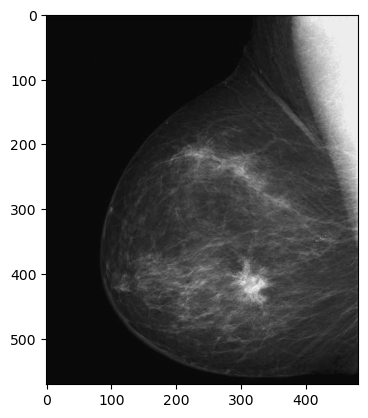

In [4]:
plt.imshow(img,cmap='gray')

In [19]:
img= cv2.imread('Fig0309(a)(washed_out_aerial_image).tif', 0)


dic={}
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if img[i,j] in dic:
            dic[img[i,j]] += 1
        else:
            dic[img[i,j]]=1
        
    


In [20]:
img

array([[199, 199, 199, ..., 230, 229, 232],
       [199, 199, 200, ..., 231, 229, 231],
       [200, 200, 200, ..., 232, 229, 229],
       ...,
       [213, 213, 217, ..., 215, 208, 211],
       [199, 199, 211, ..., 198, 202, 217],
       [199, 199, 211, ..., 198, 202, 217]], dtype=uint8)

In [21]:
key=np.array(list(dic.keys()))
freq=np.array(list(dic.values()))
pr = freq/img.size

(array([59., 26., 23., 18.,  7.,  9.,  1.,  4.,  0.,  2.]),
 array([  875. ,  2301.2,  3727.4,  5153.6,  6579.8,  8006. ,  9432.2,
        10858.4, 12284.6, 13710.8, 15137. ]),
 <BarContainer object of 10 artists>)

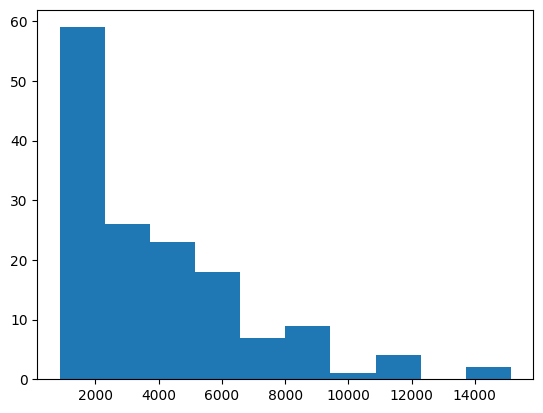

In [22]:
plt.hist(freq)

In [77]:
for i in range(key):
    for j in

SyntaxError: invalid syntax (3674567632.py, line 2)

In [47]:
roun

array([  3,   5,   8,  11,  14,  16,  20,  23,  26,  30,  34,  38,  42,
        46,  50,  54,  60,  65,  70,  75,  81,  85,  88,  93,  96, 100,
       102, 105, 108, 110, 113, 114, 117, 119, 122, 124, 125, 127, 129,
       131, 132, 134, 136, 138, 140, 142, 143, 145, 146, 148, 149, 151,
       152, 153, 154, 155, 157, 160, 162, 164, 166, 169, 171, 174, 176,
       177, 178, 180, 182, 184, 185, 186, 187, 188, 189, 190, 191, 193,
       194, 196, 198, 200, 202, 203, 204, 205, 206, 207, 208, 209, 211,
       212, 215, 216, 218, 219, 220, 221, 222, 222, 223, 224, 224, 225,
       225, 226, 227, 228, 229, 230, 230, 231, 231, 232, 233, 233, 234,
       234, 235, 235, 236, 237, 237, 238, 238, 239, 239, 240, 240, 241,
       241, 242, 242, 243, 243, 244, 244, 245, 246, 246, 247, 248, 249,
       249, 250, 252, 253, 255, 255], dtype=uint8)

In [36]:
key

array([199, 198, 197, 200, 202, 201, 203, 205, 204, 206, 208, 207, 209,
       210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 223,
       222, 225, 224, 226, 227, 228, 229, 230, 232, 233, 234, 231, 236,
       239, 243, 242, 240, 238, 237, 235, 248, 241, 244, 247, 249, 245,
       246, 250, 251, 252, 253, 193, 195, 196, 194, 190, 191, 188, 187,
       184, 192, 189, 185, 183, 180, 182, 174, 178, 176, 186, 166, 177,
       170, 168, 172, 179, 181, 167, 173, 165, 175, 163, 160, 156, 164,
       171, 254, 255, 155, 169, 157, 162, 151, 153, 149, 138, 146, 147,
       143, 158, 159, 130, 154, 161, 145, 122, 148, 137, 152, 136, 139,
       144, 142, 119, 124, 141, 125, 127, 133, 134, 131, 117,  99, 121,
       113,  94, 129,  87, 115, 111, 109, 107,  78,  90, 104,  73, 102,
        83,  97,  60,  67,  48,   0], dtype=uint8)

In [1]:
import numpy as np;
import cv2
image=cv2.imread('Fig0326(a)(embedded_square_noisy_512).tif',0)

# Define the size of the neighborhood (e.g., 3x3)
neighborhood_size = 3
half_size = neighborhood_size // 2
def local_histogram_equalization(image, neighborhood_size):
    # Create an empty image to store the result
    output_image = np.zeros_like(image)
    
    # Iterate over each pixel in the image
    for i in range(half_size, image.shape[0] - half_size):
        for j in range(half_size, image.shape[1] - half_size):
            # Define the neighborhood
            neighborhood = image[i - half_size:i + half_size + 1, j - half_size:j + half_size + 1]
            
            # Compute the histogram of the neighborhood
            hist = cv2.calcHist([neighborhood], [0], None, [256], [0, 256]).flatten()
            
            # Normalize the histogram
            hist /= hist.sum()
            
            # Compute the cumulative distribution function (CDF)
            cdf = hist.cumsum()
            
            # Map the pixel's intensity using the CDF
            new_pixel_value = np.uint8(np.interp(image[i, j], np.arange(256), cdf * 255))
            
            # Assign the new pixel value to the output image
            output_image[i, j] = new_pixel_value
            
    return output_image
# Apply global histogram equalization
equalized_image = cv2.equalizeHist(image)

# Apply local histogram equalization
result_image = local_histogram_equalization(image, neighborhood_size)
cv2.imshow('global',equalized_image)
cv2.imshow('result',result_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
fak=np.zeros_like(img)

In [7]:
fak

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

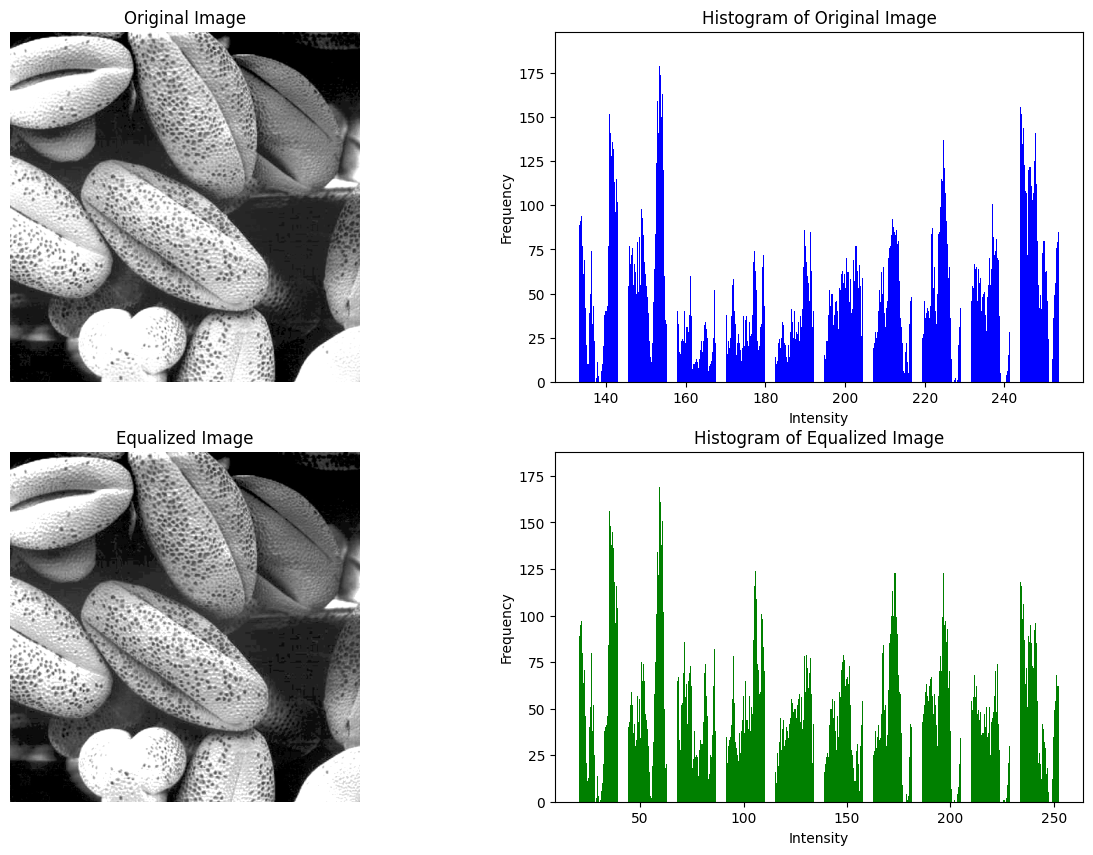

In [2]:
import matplotlib.pyplot as plt
img= cv2.imread('Fig0320(1)(top_left).tif',0)
pixels,no_pix=np.unique(img,return_counts=True)
equal_img=np.zeros(img.shape).astype('uint8')
prob = no_pix/img.size

cdf=np.cumsum(prob)
cdf_round=np.round(cdf*255).astype('uint8')
dc = dict(zip(pixels,cdf_round))
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        equal_img[i,j]=dc[img[i,j]]
       

plt.figure(figsize=(15, 10))

# Original Image
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.hist(img, facecolor='blue')
plt.title('Histogram of Original Image')
plt.xlabel('Intensity')
plt.ylabel('Frequency')

# Equalized Image
plt.subplot(2, 2, 3)
plt.imshow(equal_img, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.hist(equal_img, facecolor='green')
plt.title('Histogram of Equalized Image')
plt.xlabel('Intensity')
plt.ylabel('Frequency')

plt.show()
cv2.imshow('original',img)
cv2.imshow('equalized',equal_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


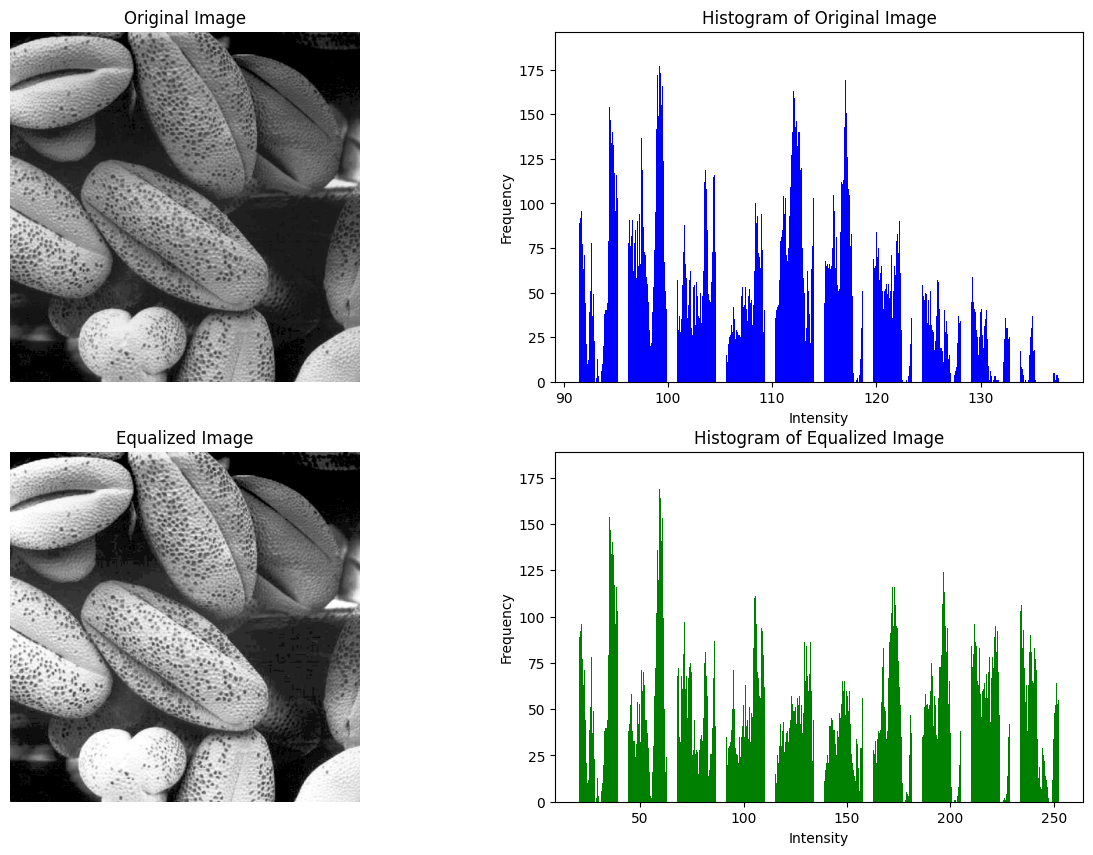

250000

In [3]:
import matplotlib.pyplot as plt
img= cv2.imread('Fig0320(2)(2nd_from_top).tif',0)
pixels,no_pix=np.unique(img,return_counts=True)
equal_img=np.zeros(img.shape).astype('uint8')
prob = no_pix/img.size

cdf=np.cumsum(prob)
cdf_round=np.round(cdf*255).astype('uint8')
dc = dict(zip(pixels,cdf_round))
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        equal_img[i,j]=dc[img[i,j]]
       

plt.figure(figsize=(15, 10))

# Original Image
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.hist(img, facecolor='blue')
plt.title('Histogram of Original Image')
plt.xlabel('Intensity')
plt.ylabel('Frequency')

# Equalized Image
plt.subplot(2, 2, 3)
plt.imshow(equal_img, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.hist(equal_img, facecolor='green')
plt.title('Histogram of Equalized Image')
plt.xlabel('Intensity')
plt.ylabel('Frequency')

plt.show()
cv2.imshow('original',img)
cv2.imshow('equalized',equal_img)
cv2.waitKey(0)
cv2.destroyAllWindows()
img.size

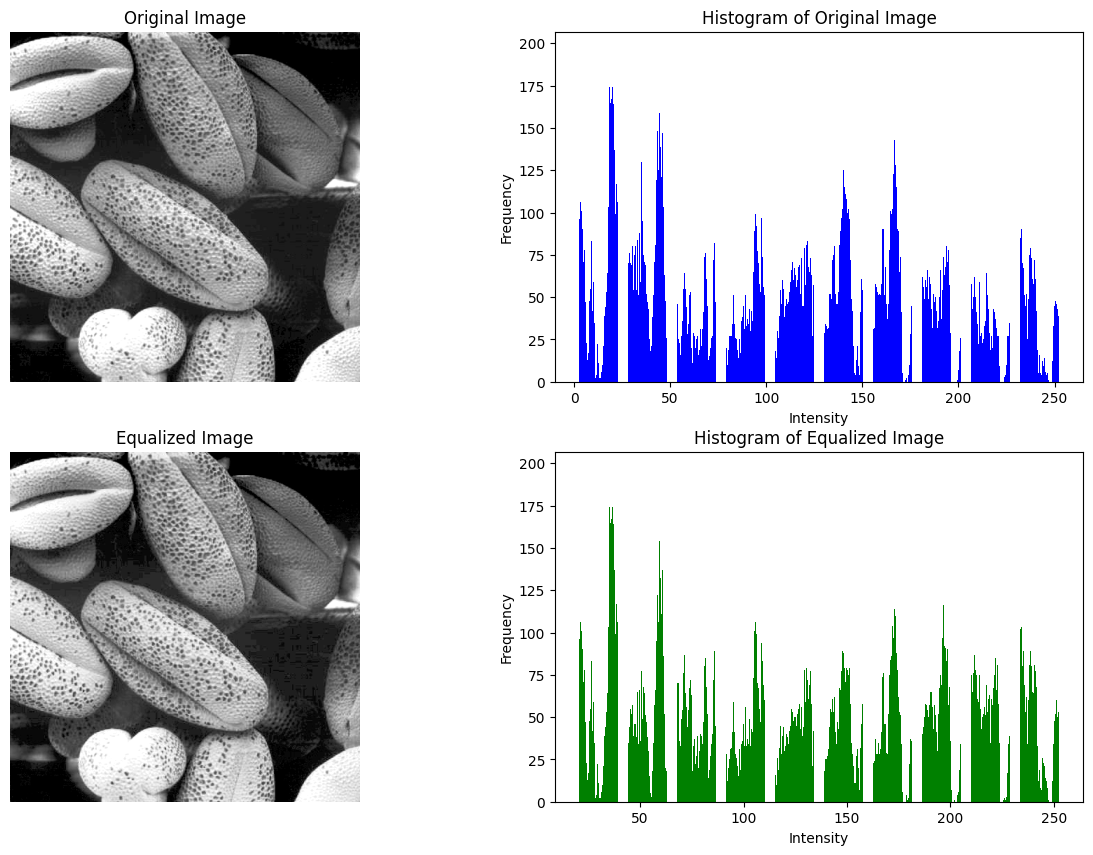

250000

In [4]:
import matplotlib.pyplot as plt
img= cv2.imread('Fig0320(3)(third_from_top).tif',0)
pixels,no_pix=np.unique(img,return_counts=True)
equal_img=np.zeros(img.shape).astype('uint8')
prob = no_pix/img.size

cdf=np.cumsum(prob)
cdf_round=np.round(cdf*255).astype('uint8')
dc = dict(zip(pixels,cdf_round))
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        equal_img[i,j]=dc[img[i,j]]
       

plt.figure(figsize=(15, 10))

# Original Image
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.hist(img, facecolor='blue')
plt.title('Histogram of Original Image')
plt.xlabel('Intensity')
plt.ylabel('Frequency')

# Equalized Image
plt.subplot(2, 2, 3)
plt.imshow(equal_img, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.hist(equal_img, facecolor='green')
plt.title('Histogram of Equalized Image')
plt.xlabel('Intensity')
plt.ylabel('Frequency')

plt.show()
cv2.imshow('original',img)
cv2.imshow('equalized',equal_img)
cv2.waitKey(0)
cv2.destroyAllWindows()
img.size

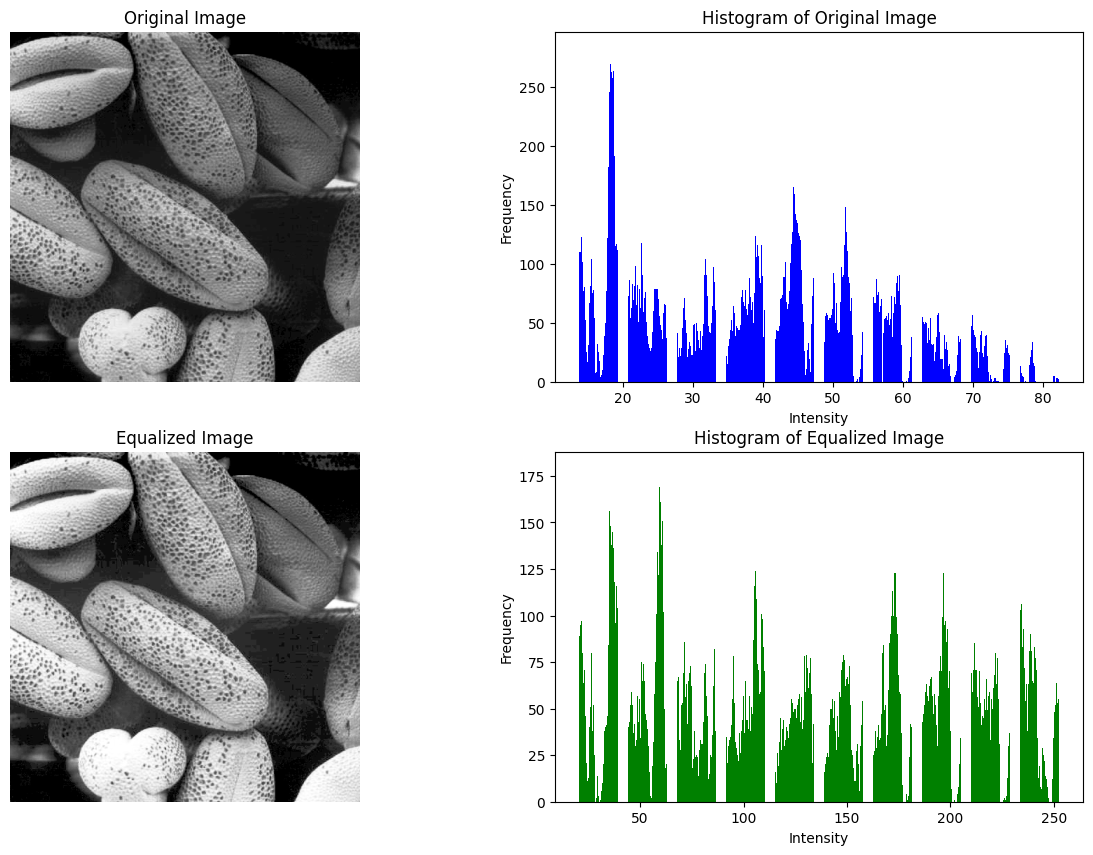

In [7]:
import matplotlib.pyplot as plt
img= cv2.imread('Fig0320(4)(bottom_left).tif',0)
pixels,no_pix=np.unique(img,return_counts=True)
equal_img=np.zeros(img.shape).astype('uint8')
prob = no_pix/img.size

cdf=np.cumsum(prob)
cdf_round=np.round(cdf*255).astype('uint8')
dc = dict(zip(pixels,cdf_round))
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        equal_img[i,j]=dc[img[i,j]]
       

plt.figure(figsize=(15, 10))

# Original Image
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.hist(img, facecolor='blue')
plt.title('Histogram of Original Image')
plt.xlabel('Intensity')
plt.ylabel('Frequency')

# Equalized Image
plt.subplot(2, 2, 3)
plt.imshow(equal_img, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.hist(equal_img, facecolor='green')
plt.title('Histogram of Equalized Image')
plt.xlabel('Intensity')
plt.ylabel('Frequency')

plt.show()
cv2.imshow('original',img)
cv2.imshow('equalized',equal_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


# Filtering

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('Fig0333(a)(test_pattern_blurring_orig).tif', 0)
filter_size = 3
box_filter = np.ones((filter_size, filter_size), dtype=np.float32) / (filter_size * filter_size)


pad = filter_size // 2
pad_img = np.pad(img, pad, mode='constant', constant_values=0)


frame_img = np.zeros_like(img)
for i in range(pad, img.shape[0] + pad):
    for j in range(pad, img.shape[1] + pad):
        region = pad_img[i-pad:i+pad+1, j-pad:j+pad+1]
        filtered_pixel = np.sum(region * box_filter)
        frame_img[i-pad, j-pad] = np.uint8(filtered_pixel)


cv2.imshow('original', img)
cv2.imshow('padded_img', pad_img)
cv2.imshow('filter_img', frame_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


###  SMOOTHING (LOWPASS) SPATIAL FILTERS 
- Box Filtering

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('Fig0333(a)(test_pattern_blurring_orig).tif', 0)
filter_size = 21
box_filter=np.ones((filter_size,filter_size),dtype='uint8')/(filter_size*filter_size)
pad = filter_size // 2
pad_img = np.pad(img, pad, mode='constant', constant_values=0)

frame_img = np.zeros_like(img)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        wind=pad_img[i:i+filter_size,j:j+filter_size]
        value=np.sum(wind * box_filter)
        frame_img[i,j]=int(value)
frame_img=frame_img.astype('uint8')        
cv2.imshow('original', img)
cv2.imshow('padded_img', pad_img)
cv2.imshow('filter_img', frame_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


###  SMOOTHING (LOWPASS) SPATIAL FILTERS 
- Guassian Filter

In [10]:
import numpy as np
import cv2
img=cv2.imread('Fig0333(a)(test_pattern_blurring_orig).tif',0)
lis=[]
filter_size=85
pad=filter_size//2
sigma=7
pad_img=np.pad(img,pad,mode='constant',constant_values=0)
for i in range(filter_size):
    for j in range(filter_size):
        lis.append(np.exp(-((i-pad)**2+(j-pad)**2)/(2*(sigma)**2)))
arr=np.array(lis).reshape(filter_size,filter_size)
arr = arr.astype('float32') / np.sum(arr)
guss=np.zeros(img.shape)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        window=pad_img[i:i+filter_size,j:j+filter_size]
        value=np.sum(window*arr)
        guss[i,j]=int(value)
      
cv2.imshow('original',img)
cv2.imshow('gussian',guss.astype('uint8'))

cv2.waitKey(0)
cv2.destroyAllWindows()
print(guss)

[[63. 70. 77. ... 77. 70. 64.]
 [70. 78. 85. ... 85. 78. 70.]
 [77. 85. 93. ... 93. 85. 77.]
 ...
 [77. 85. 93. ... 93. 85. 77.]
 [70. 78. 85. ... 85. 78. 70.]
 [63. 70. 77. ... 77. 70. 64.]]


In [11]:
import numpy as np
import cv2
img=cv2.imread('Fig0333(a)(test_pattern_blurring_orig).tif',0)
lis=[]
filter_size=43
pad=filter_size//2
sigma=7
pad_img=np.pad(img,pad,mode='constant',constant_values=0)
for i in range(filter_size):
    for j in range(filter_size):
        lis.append(np.exp(-((i-pad)**2+(j-pad)**2)/(2*(sigma)**2)))
arr=np.array(lis).reshape(filter_size,filter_size)
arr = arr.astype('float32') / np.sum(arr)
gusses=np.zeros(img.shape)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        window=pad_img[i:i+filter_size,j:j+filter_size]
        value=np.sum(window*arr)
        gusses[i,j]=int(value)
      
cv2.imshow('original',img)
cv2.imshow('gussian',gusses.astype('uint8'))
cv2.imshow('diff',guss-gusses)
cv2.imshow('kernal',arr)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [12]:
img=cv2.imread('Fig0334(a)(hubble-original).tif',0)
filter_size=151
sigma=25
pad=filter_size//2
arr=np.zeros((filter_size,filter_size))
pad_img=np.pad(img,pad,mode='constant',constant_values=0)
          
for i in range(filter_size):
    for j in range(filter_size):
        x=i-pad
        y=j-pad
        arr[i, j] = np.exp(-(x ** 2 + y ** 2) / (2 * sigma ** 2)) 
output_img=np.zeros((img.shape))
arr /= np.sum(arr)  
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        wind=pad_img[i:i+filter_size,j:j+filter_size]
        output_img[i,j]=np.sum(wind*arr)
threshold_value = 0.4 * 255
threshold=np.where(output_img>37,255,0)
threshold=threshold.astype('uint8')
cv2.imshow('original',img)
cv2.imshow('output',output_img.astype('uint8'))
cv2.imshow('threshold',threshold)
cv2.waitKey(0)
cv2.destroyAllWindows()
print(np.max(output_img))
print(img.shape)

74.48164911560612
(528, 485)


- Median Filter

In [13]:
import cv2
import numpy as np
img=cv2.imread('Fig0335(a)(ckt_board_saltpep_prob_pt05).tif',0)
filter_size=11
sigma=3
median_filter=7
med_pad=median_filter//2
guassian_filter=np.zeros((filter_size,filter_size))
pad=filter_size//2
pad_img=np.pad(img,pad,mode='constant',constant_values=0)
for i in range(guassian_filter.shape[0]):
    for j in range(guassian_filter.shape[1]):
        x=i-pad
        y=j-pad
        guassian_filter[i,j]=np.exp(-(x**2 + y**2)/(2*sigma**2))
guassian_filter/=np.sum(guassian_filter)
output=np.zeros((img.shape))
filtered_img=np.zeros((img.shape))
median_pad_img=np.pad(img,med_pad,mode='reflect')
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        window=pad_img[i:i+filter_size,j:j+filter_size]
        value=np.sum(window*guassian_filter)
        output[i,j]=int(value)
        mask=median_pad_img[i:i+med_pad,j:j+med_pad]
        sorted_value=np.sort(mask.flatten())
        median=len(sorted_value)//2
        filter_img=sorted_value[median]
        filtered_img[i,j]=filter_img
        
cv2.imshow('img',img)
cv2.imshow('guassian',output.astype('uint8'))
cv2.imshow('filtered',filtered_img.astype('uint8'))
cv2.waitKey(0)
cv2.destroyAllWindows()
guassian_filter

array([[0.00125904, 0.0020758 , 0.00306252, 0.00404311, 0.00477637,
        0.00504924, 0.00477637, 0.00404311, 0.00306252, 0.0020758 ,
        0.00125904],
       [0.0020758 , 0.00342242, 0.00504924, 0.00666597, 0.00787491,
        0.00832479, 0.00787491, 0.00666597, 0.00504924, 0.00342242,
        0.0020758 ],
       [0.00306252, 0.00504924, 0.00744935, 0.00983457, 0.01161817,
        0.0122819 , 0.01161817, 0.00983457, 0.00744935, 0.00504924,
        0.00306252],
       [0.00404311, 0.00666597, 0.00983457, 0.01298353, 0.01533823,
        0.01621447, 0.01533823, 0.01298353, 0.00983457, 0.00666597,
        0.00404311],
       [0.00477637, 0.00787491, 0.01161817, 0.01533823, 0.01811998,
        0.01915513, 0.01811998, 0.01533823, 0.01161817, 0.00787491,
        0.00477637],
       [0.00504924, 0.00832479, 0.0122819 , 0.01621447, 0.01915513,
        0.02024942, 0.01915513, 0.01621447, 0.0122819 , 0.00832479,
        0.00504924],
       [0.00477637, 0.00787491, 0.01161817, 0.01533823, 0.

###  SHARPENING (HIGHPASS) SPATIAL FILTERS 
- Laplacian 

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
def laplacian(img,lap_kernel):
    pad_row=lap_kernel.shape[0]//2
    pad_col=lap_kernel.shape[1]//2
    pad_img=np.pad(img,((pad_row,pad_row),(pad_col,pad_col)),mode='edge')
    lap_img=np.zeros((img.shape))
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            wind=pad_img[i:i+lap_kernel.shape[0],j:j+lap_kernel.shape[1]]
            res=np.sum(lap_kernel * wind)
            lap_img[i,j] =0 if res < 0 else res

    return lap_img.astype('uint8')

img=cv2.imread('Fig0338(a)(blurry_moon).tif',0)
lap_kernel=np.array([[0,1,0],[1,-4,1],[0,1,0]])
lap_kernel1=np.array([[1,1,1],[1,-8,1],[1,1,1]])
c=-1
result1=laplacian(img,lap_kernel)
result11=result1-np.min(result1)
result11=255*(result1/np.max(result1))
res2=laplacian(img,lap_kernel)
res3=laplacian(img,lap_kernel1)
result2=np.where(img+(c*res2)<0,0,img+(c*res2))
result3=np.where(img+c*res3<0,0,img+c*res3)
cv2.imshow('img',img)
cv2.imshow('lap_scale',result11.astype('uint8'))
cv2.imshow('sharpness1',result2.astype('uint8'))
cv2.imshow('sharpness2',result3.astype('uint8'))
cv2.waitKey(0)
cv2.destroyAllWindows()
result11.max()

255.0

### UNSHARP MASKING AND HIGHBOOST FILTERING


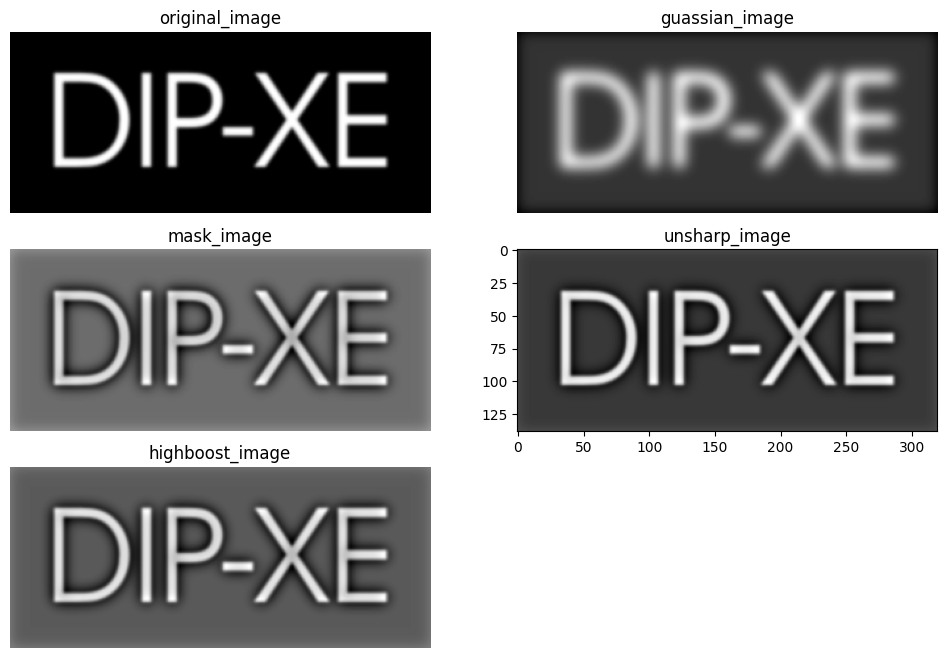

845.0

In [15]:
import numpy as np,cv2
import matplotlib.pyplot as plt
img=cv2.imread('Fig0340(a)(dipxe_text).tif',0)
filter_size=31
sigma=5
k=1
kk=4.5
guassian_filter=np.zeros((filter_size,filter_size))
pad=filter_size//2
pad_img=np.pad(img,pad,mode='constant',constant_values=0)
for i in range(guassian_filter.shape[0]):
    for j in range(guassian_filter.shape[1]):
        x=i-pad
        y=j-pad
        guassian_filter[i,j]=np.exp(-(x**2 + y**2)/(2*sigma**2))
guassian_filter/=np.sum(guassian_filter)
guassian=np.zeros((img.shape))
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        window=pad_img[i:i+filter_size,j:j+filter_size]
        value=np.sum(window*guassian_filter)
        guassian[i,j]=int(value)
# guassian1=guassian-np.min(guassian)
# guassian1=255*(guassian1/np.max(guassian1))
mask=img-guassian
mask1=mask-np.min(mask)
mask1=255*(mask/np.max(mask))
unsharp=img+(1*mask)
# unsharp1=unsharp-np.min(unsharp)
# unsharp1=255*(unsharp1/np.max(unsharp1))
highboost=img+(4.5*mask)
# highboost1=highboost-np.min(highboost)
# highboost1=255*(highboost1/np.max(highboost1))
cv2.imshow('high',highboost)
# cv2.show()
plt.figure(figsize=(12,8))
plt.subplot(3,2,1)
plt.title('original_image')
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.subplot(3,2,2)
plt.title('guassian_image')
plt.imshow(guassian,cmap='gray')
plt.axis('off')
plt.subplot(3,2,3)
plt.title('mask_image')
plt.imshow(mask1,cmap='gray')
plt.axis('off')
plt.subplot(3,2,4)
plt.title('unsharp_image')
plt.imshow(unsharp,cmap='gray')

plt.subplot(3,2,5)
plt.title('highboost_image')
plt.imshow(highboost,cmap='gray')
plt.axis('off')
plt.show()
highboost.min()
cv2.waitKey(0)
cv2.destroyAllWindows()
highboost.max()

### USING FIRST-ORDER DERIVATIVES FOR IMAGE SHARPENING—THE 
GRADIENT

In [16]:
import cv2
import numpy as np

def gradient(img):
    gx_kernel=np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
    gy_kernel=np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
    row,col=img.shape
    gx_row,gx_col=gx_kernel.shape
    gy_row,gy_col=gy_kernel.shape
    pad_row=gx_row//2
    pad_col=gy_col//2
    pad_img=np.pad(img,((pad_row,pad_col),(pad_row,pad_col)),mode='reflect')
    gradient=np.zeros((img.shape))
    for i in range(row):
        for j in range(col):
            gx=np.sum(gx_kernel*pad_img[i:i+gx_row,j:j+gx_col])
            gy=np.sum(gy_kernel*pad_img[i:i+gy_row,j:j+gy_col])
            gradient[i,j]=np.sqrt(gx**2+gy**2)
    return gradient.astype('uint8')

    
    
img=cv2.imread('Fig0342(a)(contact_lens_original).tif',0)
edge_enhancement=gradient(img)
cv2.imshow('img',img)
cv2.imshow('edge_enhancement',edge_enhancement)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [17]:
import numpy as np
import cv2
img=cv2.imread('Fig0343(a)(skeleton_orig).tif',0)
kernel=np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
laplacian_img=laplacian(img,kernel)
laplacian_img1=laplacian_img-np.min(laplacian_img)
laplacian_img1=255*(laplacian_img/np.max(laplacian_img))
cv2.imshow('img',img)
cv2.imshow('laplacian',laplacian_img1.astype('uint8'))
cv2.waitKey(0)
cv2.destroyAllWindows()
laplacian_img1.dtype

dtype('float64')

In [10]:
2**8

256

In [8]:
import cv2
import numpy as np
img=cv2.imread('Fig0310(b)(washed_out_pollen_image).tif',0)
# img1=img/img.max()
# img=(img1*255).astype('uint8')
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()
img.min()

91

In [8]:
lis=[1,2,3,4,3,2,1,3,1,3,1]


{1: 1, 2: 1, 3: 1, 4: 1}